In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/chess_datas1 - Sheet1.csv")


In [ ]:
df.dtypes

,0
Date,object
Chess Played?,object
Digit Span (Before),int64
Digit Span (After),int64
Digit Span Difference,int64


In [ ]:
df.head()

,Date,Chess Played?,Digit Span (Before),Digit Span (After),Digit Span Difference
0,2025-03-20,Yes,8,9,1
1,2025-03-21,Yes,9,10,1
2,2025-03-22,Yes,10,10,0
3,2025-03-23,Yes,12,12,0
4,2025-03-24,Yes,10,11,1


In [ ]:
df.describe()

,Digit Span (Before),Digit Span (After),Digit Span Difference
count,30.000000,30.000000,30.000000
mean,12.266667,12.833333,0.766667
std,2.258063,2.520035,1.590561
min,8.000000,7.000000,-2.000000
25%,10.000000,11.000000,0.000000
50%,12.500000,13.000000,1.000000
75%,14.000000,15.000000,1.750000
max,16.000000,17.000000,4.000000


In [ ]:
df.describe()

,Digit Span (Before),Digit Span (After),Digit Span Difference
count,30.000000,30.000000,30.000000
mean,12.266667,12.833333,0.766667
std,2.258063,2.520035,1.590561
min,8.000000,7.000000,-2.000000
25%,10.000000,11.000000,0.000000
50%,12.500000,13.000000,1.000000
75%,14.000000,15.000000,1.750000
max,16.000000,17.000000,4.000000


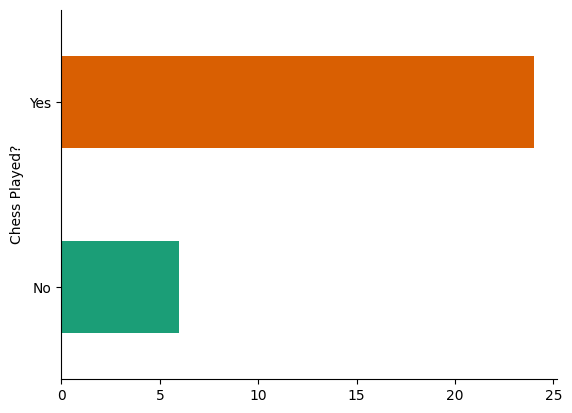

In [ ]:
# @title Chess Played?

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Chess Played?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-55-e92fc397e799>:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


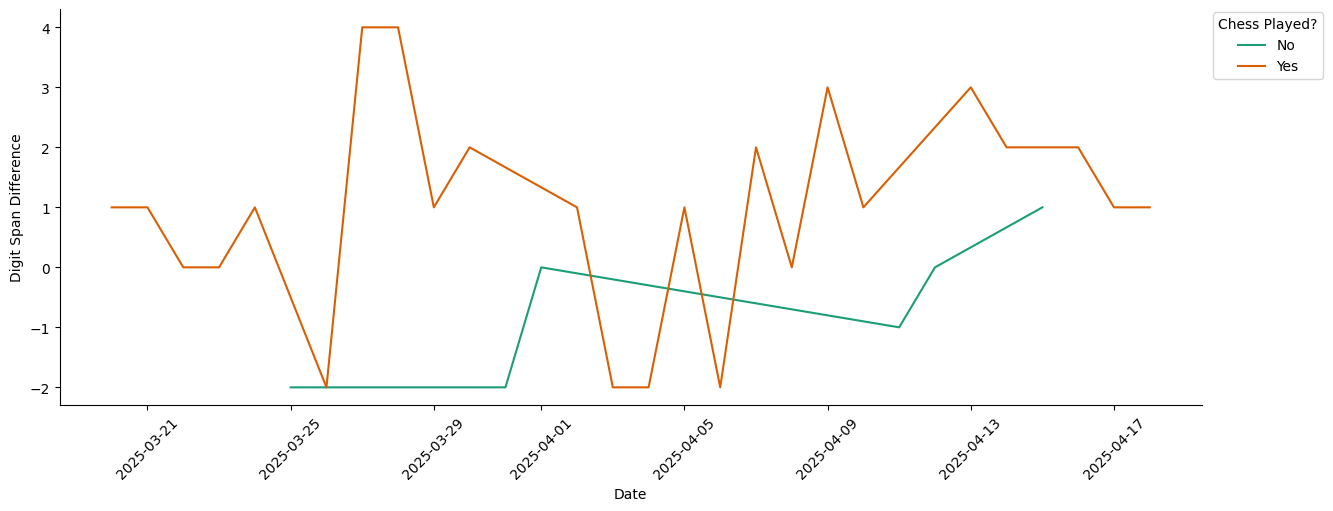

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Veri setini oku
df = pd.read_csv("/content/drive/MyDrive/processed_digit_span_data_last - processed_digit_span_data (1) - processed_digit_span_data_last - processed_digit_span_data (1).csv")

# Tarih formatını dönüştür
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Chess Played? sütununu temizle ve normalize et
df['Chess Played?'] = df['Chess Played?'].astype(str).str.strip().str.lower()
df['Chess Played?'] = df['Chess Played?'].replace({
    'yes': 'Yes',
    '1': 'Yes',
    'no': 'No',
    '0': 'No'
})

# Digit Span Difference'ı sayıya çevir ve eksik değerleri 0 yap
df['Digit Span Difference'] = pd.to_numeric(df['Digit Span Difference'], errors='coerce').fillna(0)

# Tarihe göre sırala
df_sorted = df.sort_values('Date')

# Grafik çizme fonksiyonu
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Date']
    ys = series['Digit Span Difference']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Hazırlık ve çizim
fig, ax = plt.subplots(figsize=(12, 5), layout='constrained')
for i, (series_name, series) in enumerate(df_sorted.groupby('Chess Played?')):
    _plot_series(series, series_name, i)

fig.legend(title='Chess Played?', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Digit Span Difference')
sns.despine(fig=fig, ax=ax)
plt.show()


Correlation between Chess Played and Digit Span Improvement: 0.38, p-value: 0.0398
Linear Regression Results for Digit Span Improvement:
R^2 Score: -0.01
Mean Squared Error: 4.62


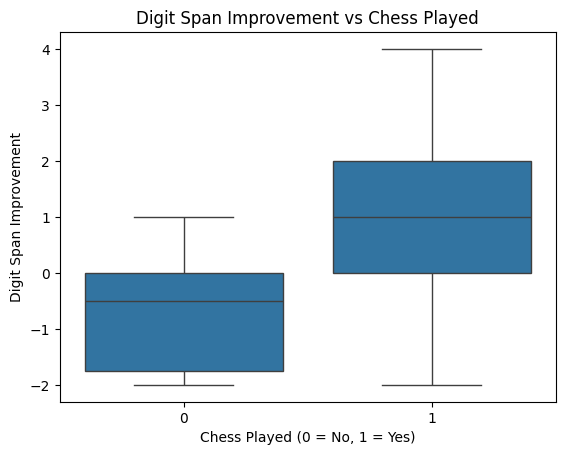

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr



# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


# Drop missing values (if any)
df.dropna(inplace=True)
df['Chess Played Binary'] = df['Chess Played?'].map({'Yes': 1, 'No': 0})

# Correlation between playing chess and improvement in digit span
correlation, p_value = pearsonr(df['Chess Played Binary'], df['Digit Span Difference'])
print(f"Correlation between Chess Played and Digit Span Improvement: {correlation:.2f}, p-value: {p_value:.4f}")

# Regression model to predict improvement in Digit Span
features = ['Digit Span (Before)', 'Chess Played Binary']
target = 'Digit Span Difference'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Linear Regression Results for Digit Span Improvement:")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

# Optional visualization
sns.boxplot(x='Chess Played Binary', y='Digit Span Difference', data=df)
plt.title("Digit Span Improvement vs Chess Played")
plt.xlabel("Chess Played (0 = No, 1 = Yes)")
plt.ylabel("Digit Span Improvement")
plt.show()


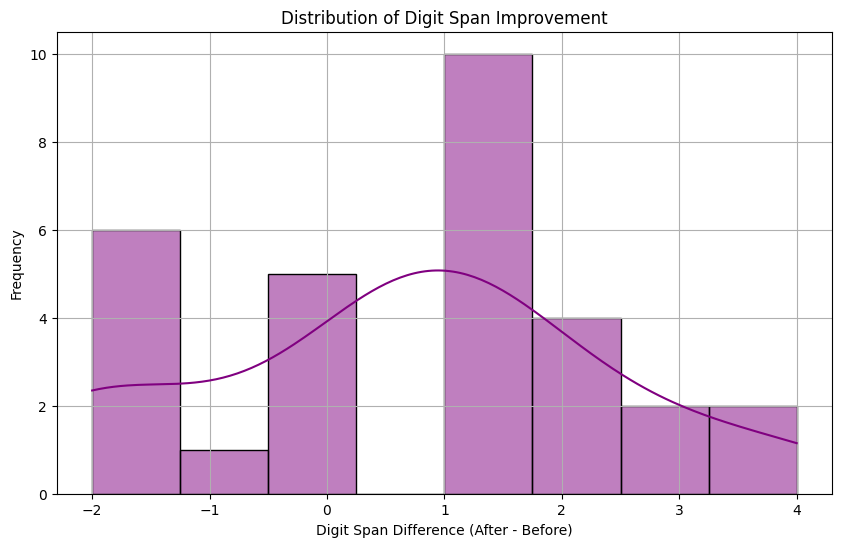

Digit Span Improvement Statistics:
Mean: 0.63
Median: 1.00
Mode: 1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/processed_digit_span_data_last - processed_digit_span_data (1) - processed_digit_span_data_last - processed_digit_span_data (1).csv")  # Change the file name if needed

# Plot histogram of Digit Span Difference
plt.figure(figsize=(10, 6))
sns.histplot(df['Digit Span Difference'], kde=True, bins=8, color='purple')
plt.title("Distribution of Digit Span Improvement")
plt.xlabel("Digit Span Difference (After - Before)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Calculate statistics
mean_diff = df['Digit Span Difference'].mean()
median_diff = df['Digit Span Difference'].median()
mode_diff = df['Digit Span Difference'].mode()[0]

print("Digit Span Improvement Statistics:")
print(f"Mean: {mean_diff:.2f}")
print(f"Median: {median_diff:.2f}")
print(f"Mode: {mode_diff}")


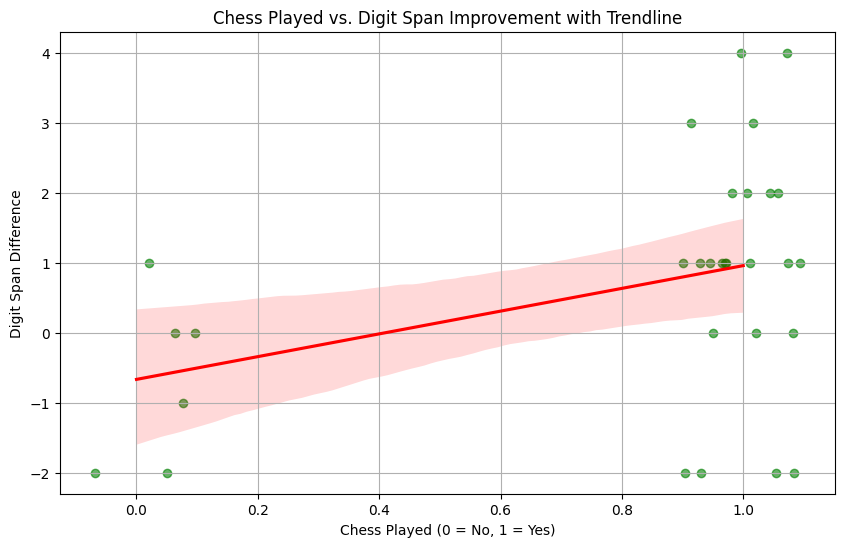

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi oku ve hazırlık (eğer zaten hazırlanmadıysa)
df = pd.read_csv("/content/drive/MyDrive/processed_digit_span_data_last - processed_digit_span_data (1) - processed_digit_span_data_last - processed_digit_span_data (1).csv")
df["Chess Played Binary"] = df["Chess Played?"].map({"Yes": 1, "No": 0})

# Grafik çizimi
plt.figure(figsize=(10, 6))
sns.regplot(
    x="Chess Played Binary",
    y="Digit Span Difference",
    data=df,
    x_jitter=0.1,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"},
    color="green"
)

plt.title("Chess Played vs. Digit Span Improvement with Trendline")
plt.xlabel("Chess Played (0 = No, 1 = Yes)")
plt.ylabel("Digit Span Difference")
plt.grid(True)
plt.show()


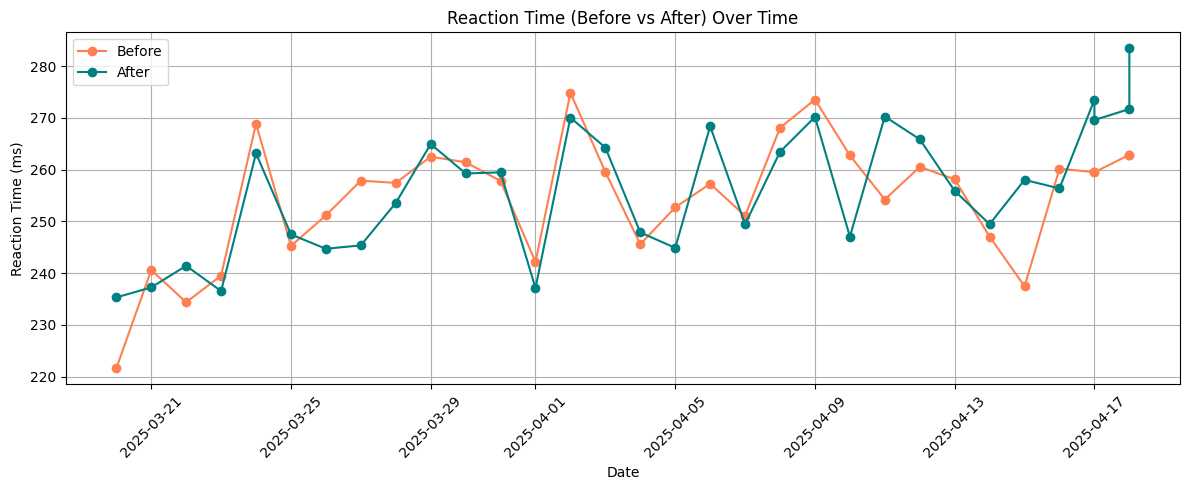

In [ ]:


# Load and clean
df = pd.read_csv("/content/drive/MyDrive/reaction_time_datas - reaction_time_datas - Sheet1 (1) (2) - reaction_time_datas - reaction_time_datas - Sheet1 (1) (2).csv")
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Reaction Time (Before)'] = df['Reaction Time (Before)'].str.replace(',', '.').astype(float)
df['Reaction Time (After)'] = df['Reaction Time (After)'].str.replace(',', '.').astype(float)
df = df.sort_values('Date')

# Plot both before and after
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Reaction Time (Before)'], marker='o', label='Before', color='coral')
plt.plot(df['Date'], df['Reaction Time (After)'], marker='o', label='After', color='teal')
plt.title("Reaction Time (Before vs After) Over Time")
plt.xlabel("Date")
plt.ylabel("Reaction Time (ms)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


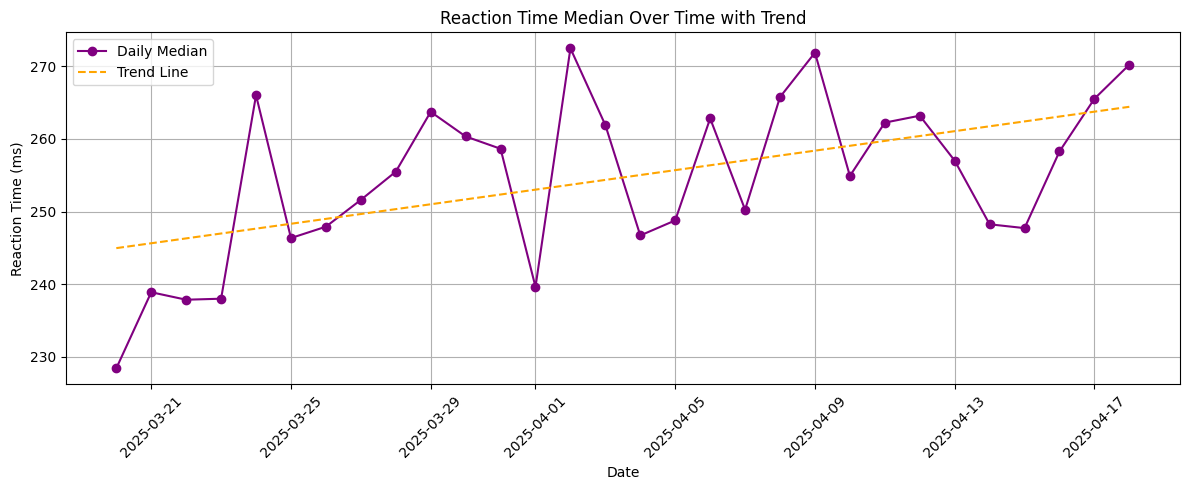

In [ ]:
#As we can see, there is an positive trend line.This might be caused by the effect o chess during 30 days period.We started at lowest point and finished at the highest point.
#Analyzing day by day does not show us enough informationsa about the results because,
#there is small differences in a day.But, looking the whole period tell us different story.


# Load & clean dataset
df = pd.read_csv("/content/drive/MyDrive/reaction_time_datas - reaction_time_datas - Sheet1 (1) (2) - reaction_time_datas - reaction_time_datas - Sheet1 (1) (2).csv")
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Reaction Time (Before)'] = df['Reaction Time (Before)'].str.replace(',', '.').astype(float)
df['Reaction Time (After)'] = df['Reaction Time (After)'].str.replace(',', '.').astype(float)

# Compute median and average per day
df['Reaction Time Median'] = df[['Reaction Time (Before)', 'Reaction Time (After)']].median(axis=1)
daily_median = df.groupby('Date')['Reaction Time Median'].mean().reset_index()

# Prepare trend line
x = np.arange(len(daily_median))
y = daily_median['Reaction Time Median'].values
z = np.polyfit(x, y, deg=1)  # linear fit
trend = np.poly1d(z)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(daily_median['Date'], y, marker='o', color='purple', label='Daily Median')
plt.plot(daily_median['Date'], trend(x), linestyle='--', color='orange', label='Trend Line')
plt.title("Reaction Time Median Over Time with Trend")
plt.xlabel("Date")
plt.ylabel("Reaction Time (ms)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-79-93990dbebc5f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Test Phase', y='Verbal Memory Score', palette='pastel', width=0.5)


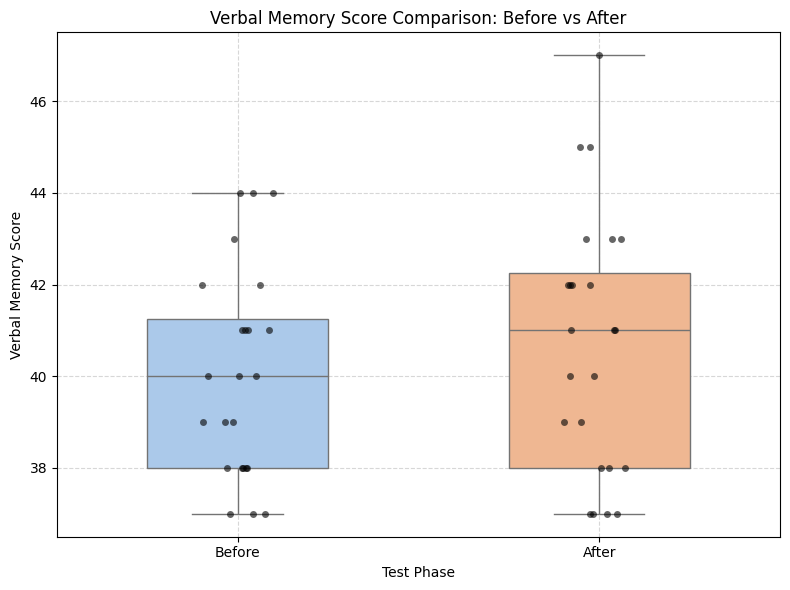

In [79]:

# Veriyi yükle ve temizle
verbal_df = pd.read_csv("/content/drive/MyDrive/verbal_test_data (2).csv")
verbal_df.columns = verbal_df.columns.str.strip()
verbal_df['Date'] = pd.to_datetime(verbal_df['Date'], dayfirst=True)

# Sadece 'Before' ve 'After' olanları al
filtered_df = verbal_df[verbal_df['Test Phase'].isin(['Before', 'After'])]

# Seaborn Boxplot + stripplot (dağılımı daha net görmek için)
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df, x='Test Phase', y='Verbal Memory Score', palette='pastel', width=0.5)
sns.stripplot(data=filtered_df, x='Test Phase', y='Verbal Memory Score',
              color='black', size=5, jitter=True, alpha=0.6)

plt.title("Verbal Memory Score Comparison: Before vs After")
plt.xlabel("Test Phase")
plt.ylabel("Verbal Memory Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



<ipython-input-82-d6c4a16352cd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivot_df, x='Date_Label', y='Improvement', palette='RdYlGn', edgecolor='black')


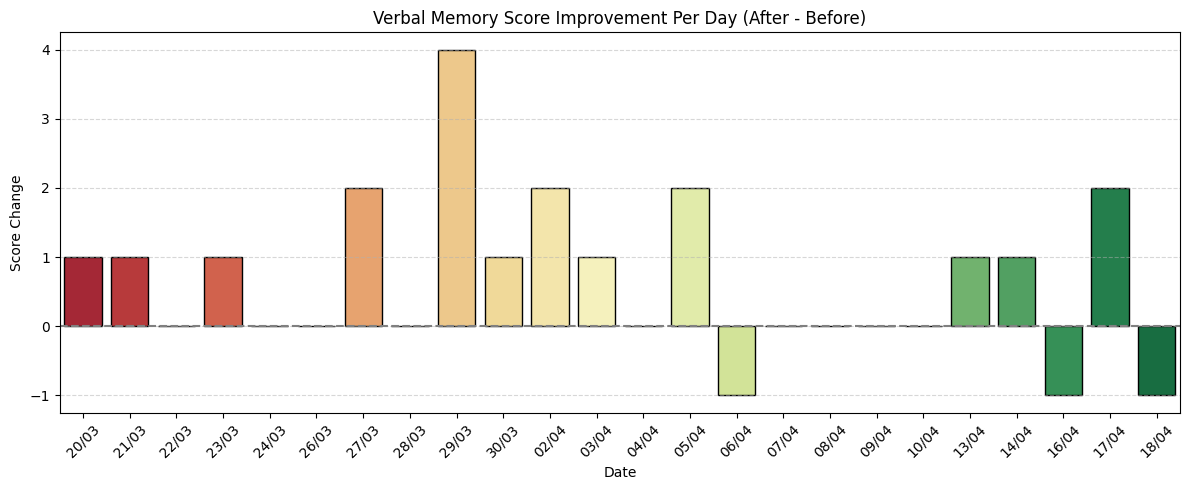

In [82]:
# Load & prepare
df = pd.read_csv("/content/drive/MyDrive/verbal_test_data (2).csv")
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
filtered = df[df['Test Phase'].isin(['Before', 'After'])].copy()
pivot_df = filtered.pivot(index='Date', columns='Test Phase', values='Verbal Memory Score').dropna().reset_index()
pivot_df['Improvement'] = pivot_df['After'] - pivot_df['Before']

# Format dates as "dd/mm"
pivot_df['Date_Label'] = pivot_df['Date'].dt.strftime('%d/%m')

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=pivot_df, x='Date_Label', y='Improvement', palette='RdYlGn', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Verbal Memory Score Improvement Per Day (After - Before)")
plt.xlabel("Date")
plt.ylabel("Score Change")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


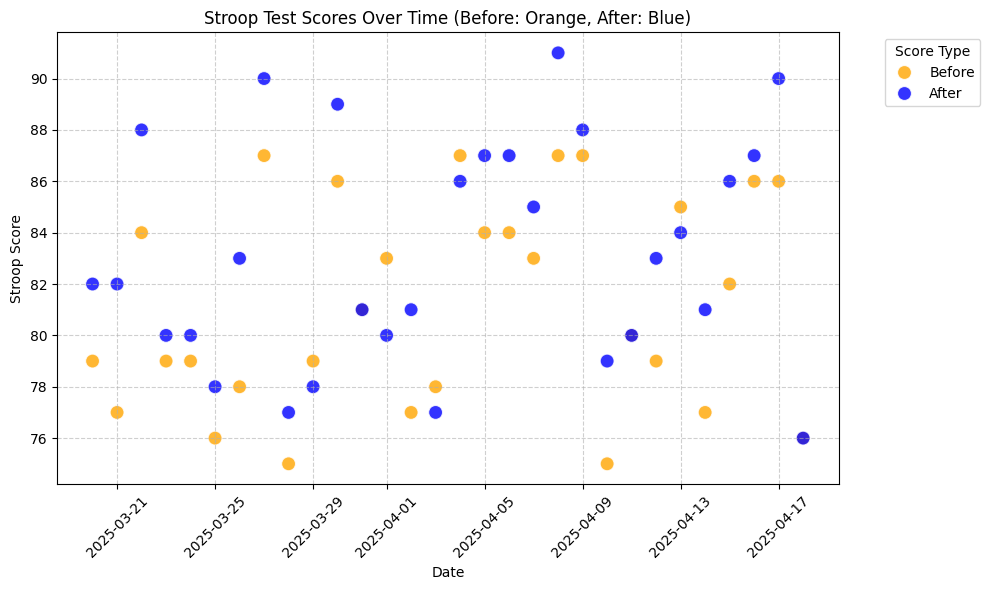

In [84]:

# Veriyi yükle ve temizle
stroop_df = pd.read_csv("/content/drive/MyDrive/Stroop_score_datas - Sheet1 (3).csv")
stroop_df.columns = stroop_df.columns.str.strip()
stroop_df_clean = stroop_df.iloc[2:].copy()
stroop_df_clean.columns = ['Date', 'Chess Played?', 'Stroop Score (Before)', 'Stroop Score (After)']
stroop_df_clean['Date'] = pd.to_datetime(stroop_df_clean['Date'], dayfirst=True)
stroop_df_clean['Stroop Score (Before)'] = stroop_df_clean['Stroop Score (Before)'].astype(float)
stroop_df_clean['Stroop Score (After)'] = stroop_df_clean['Stroop Score (After)'].astype(float)

# Yeni dataframe: Before ve After'ı tek sütuna getir
before_df = stroop_df_clean[['Date', 'Stroop Score (Before)']].copy()
before_df['Score Type'] = 'Before'
before_df.rename(columns={'Stroop Score (Before)': 'Score'}, inplace=True)

after_df = stroop_df_clean[['Date', 'Stroop Score (After)']].copy()
after_df['Score Type'] = 'After'
after_df.rename(columns={'Stroop Score (After)': 'Score'}, inplace=True)

# Birleştir
plot_df = pd.concat([before_df, after_df])

# Çizim
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x='Date',
    y='Score',
    hue='Score Type',
    palette={'Before': 'orange', 'After': 'blue'},
    s=100,
    alpha=0.8
)
plt.title("Stroop Test Scores Over Time (Before: Orange, After: Blue)")
plt.xlabel("Date")
plt.ylabel("Stroop Score")
plt.xticks(rotation=45)
plt.legend(title="Score Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


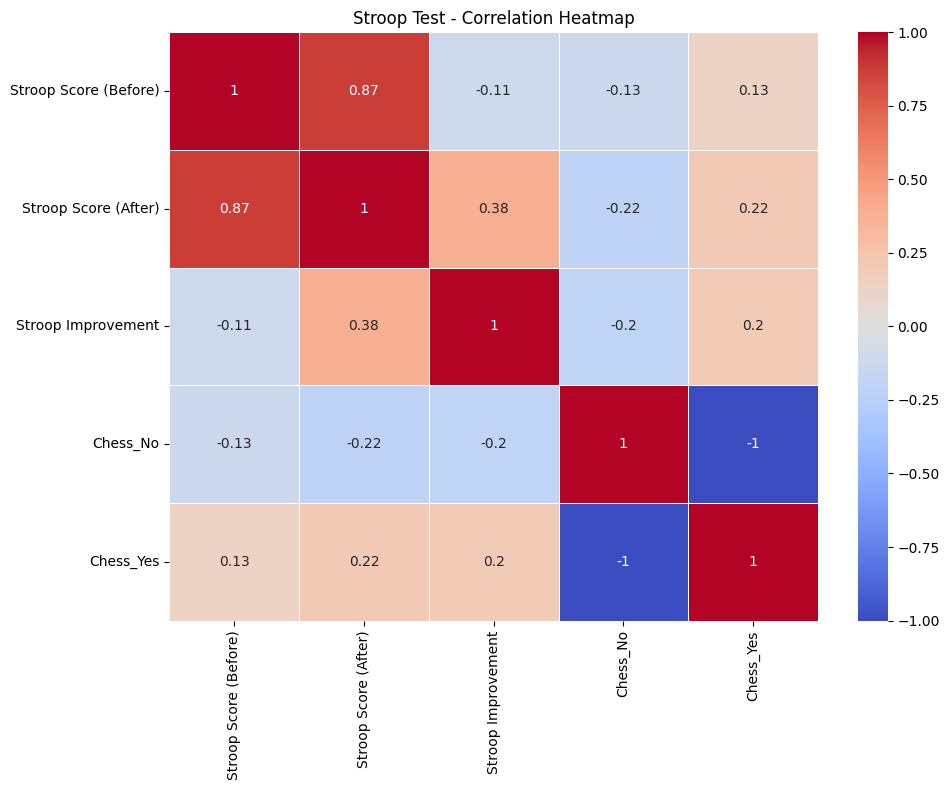

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataseti yükle
stroop_df = pd.read_csv("/content/drive/MyDrive/Stroop_score_datas - Sheet1 (3).csv")
stroop_df.columns = stroop_df.columns.str.strip()

# İlk 2 satır header, temizle
stroop_df_clean = stroop_df.iloc[2:].copy()
stroop_df_clean.columns = ['Date', 'Chess Played?', 'Stroop Score (Before)', 'Stroop Score (After)']

# Temizlik
stroop_df_clean['Date'] = pd.to_datetime(stroop_df_clean['Date'], dayfirst=True)
stroop_df_clean['Stroop Score (Before)'] = stroop_df_clean['Stroop Score (Before)'].astype(float)
stroop_df_clean['Stroop Score (After)'] = stroop_df_clean['Stroop Score (After)'].astype(float)

# Improvement (After - Before) hesapla
stroop_df_clean['Stroop Improvement'] = stroop_df_clean['Stroop Score (After)'] - stroop_df_clean['Stroop Score (Before)']

# Chess Played? One-hot encode
chess_encoded = pd.get_dummies(stroop_df_clean['Chess Played?'], prefix='Chess')

# Encode'ları ana dataframe'e ekle
stroop_df_clean = pd.concat([stroop_df_clean, chess_encoded], axis=1)

# Correlation matrisi için kullanılacak sütunlar
correlation_features = ['Stroop Score (Before)', 'Stroop Score (After)', 'Stroop Improvement'] + list(chess_encoded.columns)

# Correlation hesapla
correlation = stroop_df_clean[correlation_features].corr()

# Heatmap çizimi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Stroop Test - Correlation Heatmap")
plt.tight_layout()
plt.show()
